# IMPORT LIBRARY

In [423]:
!pip install emoji
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [424]:
import pandas as pd
import re, string
from collections import Counter
import emoji
import requests, json, nltk, re, string, os
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
from requests_oauthlib import OAuth1
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk import ngrams
from nltk.corpus import stopwords
from wordcloud import WordCloud
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import tqdm
import seaborn as sns
import networkx as nx
import time
import spacy

In [425]:
import nltk
import random
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [426]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# READ DAN EKSPLORASI DATASET

In [427]:
ig_df = pd.read_csv('hasilInstagram.csv', sep=';')
twt_df = pd.read_csv('hasilTwitter.csv', sep=';')

In [428]:
ig_df.drop(columns='Unnamed: 0', inplace = True)
ig_df.head()

,link,hasil
0,https://www.instagram.com/p/CELtE7SHVZf/,"['Cinta bermula dr mata, jd gak heran jika cin..."
1,https://www.instagram.com/p/CopdT8YL1ai/,['Street photography Mangrove finale part\n\nS...
2,https://www.instagram.com/p/CbCOOTLpoYH/,['Selamat berakhir pekan meskipun tanpa ayang....
3,https://www.instagram.com/p/CNEGFpyJVDz/,"['Mari bercocok taman, membuat rumah ikan....\..."
4,https://www.instagram.com/p/Cs7_XrmO358/,['81 Persistent goes to MANGROVE !\n•\n•\n•\n#...


In [429]:
twt_df.drop(columns='Unnamed: 0', inplace = True)
twt_df.head()

,link,hasil
0,https://twitter.com/ngopibareng_id/status/1667...,['Gubernur Jawa Timur Khofifah Indar Parawansa...
1,https://twitter.com/imediacyber/status/1667413...,['Gubernur Khofifah: Cobain Berkunjung ke Huta...
2,https://twitter.com/JatimPemprov/status/166737...,"['Memperingati Hari Lingkungan Hidup Sedunia, ..."
3,https://twitter.com/plndisjatim/status/1667313...,"['""Serentak hari ini di 8 lokasi yakni kawasan..."
4,https://twitter.com/superradioid/status/166710...,"['SR, Surabaya – Dalam rangka peringatan Hari ..."


In [430]:
all_df = pd.concat([ig_df, twt_df])
all_df = all_df.reset_index(drop=True)
all_df.head()

,link,hasil
0,https://www.instagram.com/p/CELtE7SHVZf/,"['Cinta bermula dr mata, jd gak heran jika cin..."
1,https://www.instagram.com/p/CopdT8YL1ai/,['Street photography Mangrove finale part\n\nS...
2,https://www.instagram.com/p/CbCOOTLpoYH/,['Selamat berakhir pekan meskipun tanpa ayang....
3,https://www.instagram.com/p/CNEGFpyJVDz/,"['Mari bercocok taman, membuat rumah ikan....\..."
4,https://www.instagram.com/p/Cs7_XrmO358/,['81 Persistent goes to MANGROVE !\n•\n•\n•\n#...


In [431]:
all_df.isnull().sum()

link      0
hasil    54
dtype: int64

In [432]:
all_df.dropna(inplace=True)
all_df.isnull().sum()

link     0
hasil    0
dtype: int64

# PREPROCESSING

In [433]:
# CONVERT EMOJI
def convert_emoji(text):
  text = emoji.demojize(text)
  return text

In [434]:
all_df['hasil'] = all_df['hasil'].apply(lambda x: convert_emoji(x))

In [435]:
# LOWERING
all_df['hasil'] = all_df['hasil'].apply(lambda x: x.lower())

In [436]:
all_df.head()

,link,hasil
0,https://www.instagram.com/p/CELtE7SHVZf/,"['cinta bermula dr mata, jd gak heran jika cin..."
1,https://www.instagram.com/p/CopdT8YL1ai/,['street photography mangrove finale part\n\ns...
2,https://www.instagram.com/p/CbCOOTLpoYH/,['selamat berakhir pekan meskipun tanpa ayang....
3,https://www.instagram.com/p/CNEGFpyJVDz/,"['mari bercocok taman, membuat rumah ikan....\..."
4,https://www.instagram.com/p/Cs7_XrmO358/,['81 persistent goes to mangrove !\n•\n•\n•\n#...


In [437]:
#menghilangkan karakter yang tidak diperlukan, merubah menjadi huruf kecil
def case_folding(text):
  text = re.sub(r"\d+","",text)
  text = re.sub(r"(?<!\S)\n(?!\S)", "", text)
  text = re.sub(r"\t+","",text)
  text = re.sub(r"#\w+","",text)
  text = re.sub(r"\b\w\b", "", text)
  text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z \t])|(\w+:\/\/\S+)|(\d+)", " ", text).split())
  return text

In [438]:
all_df['hasil'] = all_df['hasil'].apply(lambda x: case_folding(x))

In [439]:
all_df.head()

,link,hasil
0,https://www.instagram.com/p/CELtE7SHVZf/,cinta bermula dr mata jd gak heran jika cinta ...
1,https://www.instagram.com/p/CopdT8YL1ai/,street photography mangrove finale part nsuppo...
2,https://www.instagram.com/p/CbCOOTLpoYH/,selamat berakhir pekan meskipun tanpa ayang
3,https://www.instagram.com/p/CNEGFpyJVDz/,mari bercocok taman membuat rumah ikan thumbs ...
4,https://www.instagram.com/p/Cs7_XrmO358/,persistent goes to mangrove


In [440]:
# REMOVE ALAY WORDS
alay_df = pd.read_csv('colloquial-indonesian-lexicon.csv')
alay_dict = dict(zip(alay_df['slang'], alay_df['formal']))

def remove_alay(text):
  return ' '.join(alay_dict[word] if word in alay_dict else word for word in text.split(' '))

In [441]:
all_df['hasil'] = all_df['hasil'].apply(lambda x: remove_alay(x))

In [442]:
all_df.head()

,link,hasil
0,https://www.instagram.com/p/CELtE7SHVZf/,cinta bermula dari mata jadi enggak heran jika...
1,https://www.instagram.com/p/CopdT8YL1ai/,street photography mangrove finale part nsuppo...
2,https://www.instagram.com/p/CbCOOTLpoYH/,selamat berakhir pekan meskipun tanpa ayang
3,https://www.instagram.com/p/CNEGFpyJVDz/,mari bercocok taman membuat rumah ikan thumbs ...
4,https://www.instagram.com/p/Cs7_XrmO358/,persistent goes tapi mangrove


In [443]:
# REMOVE STOPWORDS
def remove_stopwords(text):
  sw_indonesia = stopwords.words("indonesian")
  sw_inggris = stopwords.words("english")

  hasil = []
  for word in text.split():
    if word in sw_indonesia or word in sw_inggris:
      hasil.append('')
    else:
      hasil.append(word)

  return (" ".join(hasil))

In [444]:
# SASTRAWI
def remove_sastrawi(text):
  factory = StopWordRemoverFactory()
  stopword_remover = factory.create_stop_word_remover()
  text = stopword_remover.remove(text)
  return text

In [445]:
all_df['hasil'] = all_df['hasil'].apply(lambda x: remove_stopwords(x))
all_df['hasil'] = all_df['hasil'].apply(lambda x: remove_sastrawi(x))

In [446]:
all_df.head()

,link,hasil
0,https://www.instagram.com/p/CELtE7SHVZf/,cinta mata heran cinta air mata anjimm...
1,https://www.instagram.com/p/CopdT8YL1ai/,street photography mangrove finale part nsuppo...
2,https://www.instagram.com/p/CbCOOTLpoYH/,selamat pekan ayang
3,https://www.instagram.com/p/CNEGFpyJVDz/,bercocok taman rumah ikan thumbs dark skin t...
4,https://www.instagram.com/p/Cs7_XrmO358/,persistent goes mangrove


In [447]:
# Menghapus kata slang pada data twitter yang telah dibersihkan sebelumnya
slang_dict = {
    "u": "","ya":"","kak": "","lfl": "","yg":"","by":"","my":"","n":"",
    "is":"","nih":"","d":"","lb": "","gr": "","wes": "sudah","cr":"","the":"",
    "fff":"","cm":"","x":"","yuk":"ayo","ootd":"","to":"","om":"","e":"",
    "n":"","p":"","mas":"","nya":"","ga":"tidak","nya":"","gak":"tidak","tak":"tidak",
    "rt":"","gunung":"","anyar":"","mangrove":"","wonorejo":"","surabaya":"","hutan":"",
    "hutan":"","indonesia":"","medokan":"","tambak":"","kebun":"","timur":"","mangrovesurabaya":"","forest":"",
    "sungai":"","forest":"","earth":"","jatim":"","pantai":"","aku":"","kenjeran":"","mangrovewonorejo":"",
    "mangrovegununganyar":"","east":"","mangrovegununganyar":"","asliareksuroboyo":"","aslisuroboyo":"",
    "banggasurabaya":"","infosurabaya":"","suroboyo":"","hutanbambukeputih ":"",
    "surabayapunyacerita":"","pojoksurabaya":"","exploresurabaya":"","kebunbibitsurabaya":"",
    "wisatasurabaya":"","surabayaphotography":"","preweddingsurabaya":"","cfdsurabaya":"",
    "sidoarjo":"","button":"","kenpark":"","banggasidoarjo":"","tamanbungkul":"","surabayaphotographer":"",
    "kenjeranpark":"","preweddingsidoarjo":"", 'areksuroboyo': '', 'surabayaprewedding': '', 'preweddingmalang': '', 'photographysidoarjo': '', 'krian': '', 'wisatamangrove': '',
    "explorejawatimur":"",'wisatamangrovesurabaya': '', 'menit': '', 'ekowisatamangrove': '',
    "rungkut":"","berjilbabnya":"","ekowisata":"","hutanmangrove":"","i":""
    }

In [448]:
# REMOVE SLANG
def remove_slang(text):
  return ' '.join(slang_dict[word] if word in slang_dict else word for word in text.split(' '))

all_df['hasil'] = all_df['hasil'].apply(lambda x: remove_slang(x))

In [449]:
all_df.head()

,link,hasil
0,https://www.instagram.com/p/CELtE7SHVZf/,cinta mata heran cinta air mata anjimm...
1,https://www.instagram.com/p/CopdT8YL1ai/,street photography finale part nsupport editi...
2,https://www.instagram.com/p/CbCOOTLpoYH/,selamat pekan ayang
3,https://www.instagram.com/p/CNEGFpyJVDz/,bercocok taman rumah ikan thumbs dark skin t...
4,https://www.instagram.com/p/Cs7_XrmO358/,persistent goes


In [450]:
# FUNGSI UNTUK DETEKSI ADANYA NOMOR TELEFON
def detect_phone(text):
    pattern = r"\b(?:\+62|62|0)(?:[-.\s]?(?:\d[-.\s]?){8,11}|(?<!\/)\d{8,11}(?!\d))\b"
    matches = re.findall(pattern, text)

    pattern = r'\+\d{2}\d{3}-\d{4}-\d{4}'
    matches2 = re.findall(pattern, text)

    if len(matches) > 0 or 'dijual' in text or len(matches2) > 0 or 'rumah' in text or 'link' in text or 'hunian' in text or 'promo' in text or 'property' in text or 'properti' in text:
        return True
    else:
        return False

In [451]:
# DROP CONTAINS NUMBER
all_df_copy = all_df.copy()
before = all_df_copy.shape[0]
print("Before length: ", before)

all_df_copy.reset_index(drop=True, inplace=True)

for idx, text in enumerate(all_df_copy['hasil']):
  if detect_phone(str(text)) == True:
    all_df_copy.drop(idx, inplace=True)
after = all_df_copy.shape[0]
print("After length: ", after)

Before length:  2856
After length:  2312


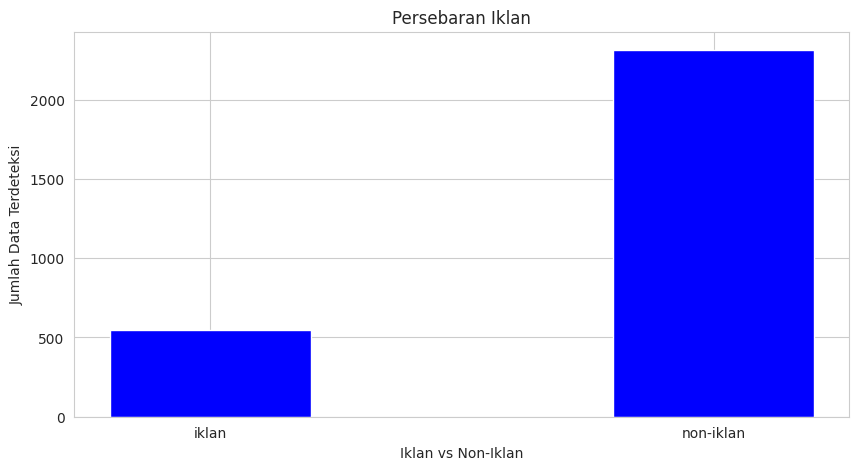

In [452]:
# VISUALISASI DATA TERDETEKSI IKLAN
labels = ["iklan", "non-iklan"]
values = [before-after, after]

fig = plt.figure(figsize = (10, 5))
plt.bar(labels, values, color ='blue', width = 0.4)

plt.xlabel("Iklan vs Non-Iklan")
plt.ylabel("Jumlah Data Terdeteksi")
plt.title("Persebaran Iklan")
plt.show()

In [453]:
all_df_copy.to_csv("cleanHasil.csv", sep=";")

# ANALISIS

In [454]:
def char_freq_dist(data):
    bins = np.arange(0,270,10)
    plot_1 =plt.figure(1)
    data.str.len().hist(bins=bins)
    plt.title("Distribusi Jumlah Huruf ")

def word_len_freq_dist(data):
    bin_range = np.arange(0,50)
    plot_2 =plt.figure(2)
    data.str.split().map(lambda x: len(x)).hist(bins=bin_range)
    plt.title("Distribusi Jumlah Kata")

def mean_word_freq_dist(data):
    plot_3 =plt.figure(3)
    data.str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
    plt.title("Distribusi Panjang Kata Rata-Rata")

def bigram_freq_dist(data):
    data_to_list = [word for news in data for word in news.split()]
    result = pd.Series(nltk.ngrams(data_to_list,2)).value_counts()[:20]
    return result


def wordcloud_visualization(data):
    wcloud = WordCloud(width=1600, height=800, max_font_size=200).generate_from_frequencies(data)
    plt.figure(figsize=(12,10))
    plt.imshow(wcloud, interpolation="bilinear")

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



(smiling, face)      616
(face, heart)        417
(heart, eyes)        417
(minus, minus)       189
(eyes, smiling)      189
(red, heart)         187
(tears, joy)         186
(face, tears)        185
(face, smiling)      178
(smiling, eyes)      173
(take, foto)          99
(clapping, hands)     98
(camera, flash)       86
(folded, hands)       78
(grinning, face)      76
(skin, tone)          74
(thumbs, thumbs)      72
(joy, face)           69
(beaming, face)       67
(light, skin)         63
dtype: int64


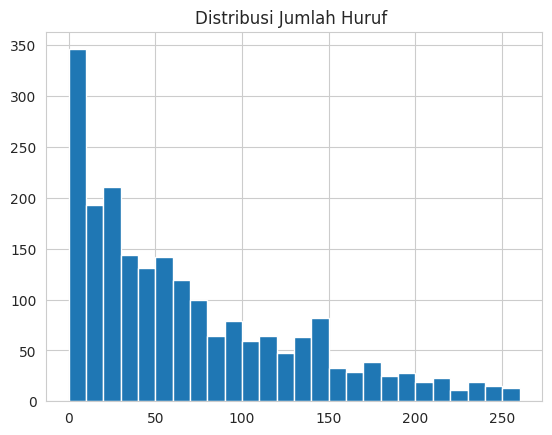

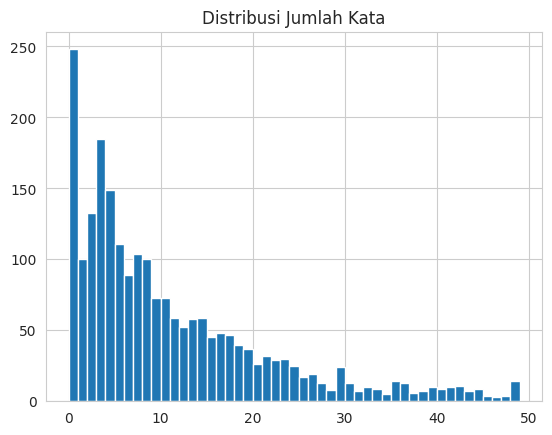

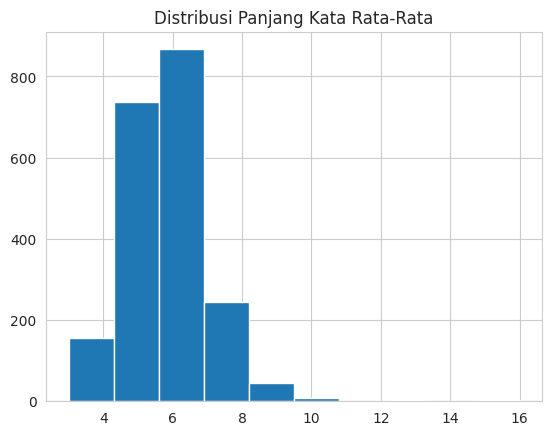

In [455]:
char_freq_dist(all_df_copy["hasil"])
word_len_freq_dist(all_df_copy["hasil"])
mean_word_freq_dist(all_df_copy["hasil"])
bigram = bigram_freq_dist(all_df_copy["hasil"])
print(bigram)
plt.show()

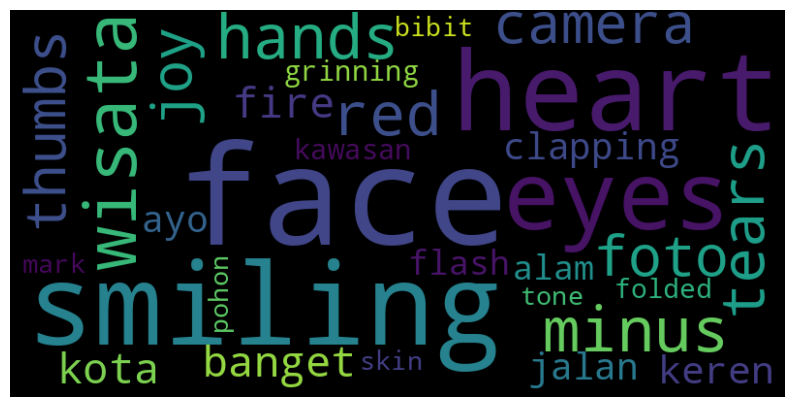

In [456]:
#Visualisasi Word Cloud
full = ''
for komen in all_df_copy["hasil"]:
    full += komen
words = full.split()

word_count = Counter(words)
top = word_count.most_common(30)
word_freq = dict(top)

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# SENTIMENT ANALISIS

## dengan daftar lexicon

In [457]:
# REF: https://github.com/fajri91/InSet , word | weight
positif_list = pd.read_table('positive.tsv')
negatif_list = pd.read_table('negative.tsv')

positif_list["weight"] = positif_list["weight"].astype(int)
positif_list['wieght'] = (positif_list['weight'] - positif_list['weight'].min()) / (positif_list['weight'].max() - positif_list['weight'].min())
negatif_list["weight"] = negatif_list["weight"].astype(int)
negatif_list['wieght'] = (negatif_list['weight'] - negatif_list['weight'].min()) / (negatif_list['weight'].max() - negatif_list['weight'].min())

In [458]:
df = pd.read_csv('SemEval2015-English-Twitter-Lexicon.txt', sep='\t', header=None, names=['weight', 'word'])
negative = df[df['weight'] < 0]
positive = df[df['weight'] > 0]

In [459]:
def sentiment_analysis(data):
  tweets = [tweet for tweet in data]
  hasil = []
  for tweet in tweets:
      tweet_clean = tweet.strip().split()

      good_count = 0
      bad_count = 0

      for idx, good_word in enumerate(positif_list["word"]):
          count = tweet_clean.count(good_word.strip().lower())
          if count > 0:
            good_count = good_count + (count * positif_list['weight'][idx])
      for idx, good_word in enumerate(positive["word"]):
          count = tweet_clean.count(good_word.strip().lower())
          if count > 0:
            good_count = good_count + (count * positif_list['weight'][idx])

      for bad_word in negatif_list["word"]:
          count = tweet_clean.count(bad_word.strip().lower())
          if count > 0:
            bad_count = bad_count + (count * negatif_list['weight'][idx])
      for bad_word in negative["word"]:
          count = tweet_clean.count(bad_word.strip().lower())
          if count > 0:
            bad_count = bad_count + (count * negatif_list['weight'][idx])

      hasil.append(good_count + bad_count)
  return hasil

In [460]:
hasil = sentiment_analysis(all_df_copy["hasil"])
sentiments = [2 if sentimen > 0 else (1 if sentimen == 0 else 0) for sentimen in hasil]
all_df_copy["sentiment"] = sentiments
all_df_copy.to_csv('sentimen_lexicon.csv', sep=';')
all_df_copy.head()

,link,hasil,sentiment
0,https://www.instagram.com/p/CELtE7SHVZf/,cinta mata heran cinta air mata anjimm...,0
1,https://www.instagram.com/p/CopdT8YL1ai/,street photography finale part nsupport editi...,0
2,https://www.instagram.com/p/CbCOOTLpoYH/,selamat pekan ayang,2
4,https://www.instagram.com/p/Cs7_XrmO358/,persistent goes,1
5,https://www.instagram.com/p/CG877Y9BuI4/,halo nlong weekend kali pergi nkalau bi...,0


In [461]:
all_df_copy[:200].to_csv("shadowLabelling.csv", sep=";")

# dengan SHADOW LABELLING

dilakukan pemberian labelling secara manual terhadap 200 dataset yang ada, dengan kelas sentimen positif, netral, dan negatif

In [462]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [463]:
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from nltk import word_tokenize

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
import itertools

from sklearn import metrics

from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from statistics import mean
from sklearn.feature_extraction.text import TfidfVectorizer


from numpy import mean
from numpy import std

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from keras.utils import to_categorical

from sklearn.metrics import accuracy_score

In [464]:
sentimen = pd.read_csv('jadi_shadowLabelling.csv', sep=";")

In [465]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# Example sentiment data
texts = sentimen['hasil'].astype(str).tolist()

# Example sentiment labels (0: negative, 1: neutral, 2: positive)
labels = np.array(sentimen['sentiment'].tolist())

# Split the data into training and testing sets
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts_train)
vocab_size = len(tokenizer.word_index) + 1

# Convert text data to sequences
sequences_train = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

# Pad sequences to have the same length
max_length = 10
X_train = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_test = pad_sequences(sequences_test, maxlen=max_length, padding='post')

# Convert labels to one-hot encoding
num_classes = 3
y_train = np.eye(num_classes)[labels_train]
y_test = np.eye(num_classes)[labels_test]

# Create the BLSTM model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/5
10/10 [==============================] - 6s 134ms/step - loss: 1.0518 - accuracy: 0.4938 - val_loss: 0.9632 - val_accuracy: 0.6000
Epoch 2/5
10/10 [==============================] - 0s 15ms/step - loss: 0.8974 - accuracy: 0.5750 - val_loss: 0.8905 - val_accuracy: 0.6000
Epoch 3/5
10/10 [==============================] - 0s 18ms/step - loss: 0.7393 - accuracy: 0.6438 - val_loss: 0.8590 - val_accuracy: 0.6000
Epoch 4/5
10/10 [==============================] - 0s 16ms/step - loss: 0.6118 - accuracy: 0.8562 - val_loss: 0.8262 - val_accuracy: 0.6500
Epoch 5/5
2/2 [==============================] - 0s 16ms/step - loss: 0.9838 - accuracy: 0.6750
Test Loss: 0.9837815165519714
Test Accuracy: 0.675000011920929


In [466]:
# Assuming you have already trained the model

# Example text data for prediction
new_texts = all_df_copy[200:]['hasil'].astype(str).tolist()

# Convert the new text data to sequences
new_sequences = tokenizer.texts_to_sequences(new_texts)

# Pad the sequences to have the same length
new_sequences_padded = pad_sequences(new_sequences, maxlen=max_length, padding='post')

# Make predictions
predictions = model.predict(new_sequences_padded)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Print the predicted labels
print(predicted_labels)

66/66 [==============================] - 2s 9ms/step
[2 1 1 ... 1 1 1]


In [467]:
# SAVE HASIL PADA CSV
hasil_shadow = pd.DataFrame(list(zip(all_df_copy[200:]['hasil'], predicted_labels)), columns=['hasil', 'sentiment'])
hasil_shadow = pd.concat([sentimen, hasil_shadow])
hasil_shadow = hasil_shadow.reset_index(drop=True)
hasil_shadow.to_csv('hasil_shadow.csv', sep=";")

# ANALISIS HASIL SENTIMENT

In [468]:
def descriptive_visual(hasil):
    print (f'''
    Mean: {np.mean(hasil)}
    Median: {np.median(hasil)}
    quartil awal: {np.quantile(hasil,0.25)}
    quartil akhir: {np.quantile(hasil,0.75)}
    Standar deviasi: {np.std(hasil)}
    ''')
    labels, counts = np.unique(hasil, return_counts=True)

    fig, ax = plt.subplots()
    ax.set_xticks(ax.get_xticks())

    sns.barplot(x = list(labels),
                y = list(counts))

    sns.lineplot(x = ax.get_xticks(),
                y = list(counts))

    plt.title(f'Distribution Sentiment')
    plt.xlabel('Labels')
    plt.ylabel('Counts')

    plt.show()

## dengan lexicon


    Mean: -0.7158304498269896
    Median: 0.0
    quartil awal: -4.0
    quartil akhir: 3.0
    Standar deviasi: 15.412498587790935
    


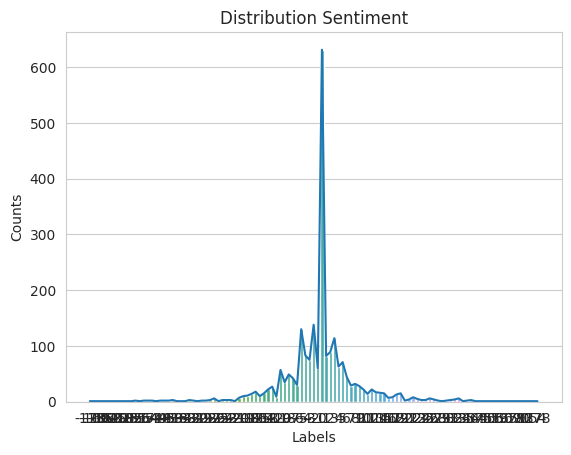

In [469]:
descriptive_visual(hasil)

In [470]:
dist = all_df_copy['sentiment'].value_counts()
dist

0    905
2    776
1    631
Name: sentiment, dtype: int64

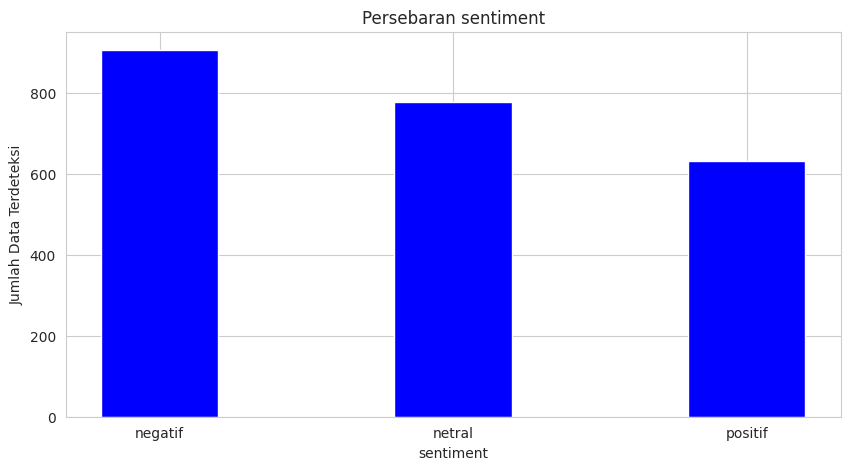

In [471]:
# VISUALISASI DATA TERDETEKSI IKLAN
labels = ["negatif", "netral", "positif"]

fig = plt.figure(figsize = (10, 5))
plt.bar(labels, dist, color ='blue', width = 0.4)

plt.xlabel("sentiment")
plt.ylabel("Jumlah Data Terdeteksi")
plt.title("Persebaran sentiment")
plt.show()

## dengan shadow labelling

In [472]:
dist = hasil_shadow['sentiment'].value_counts()
dist

1    1886
2     418
0       8
Name: sentiment, dtype: int64

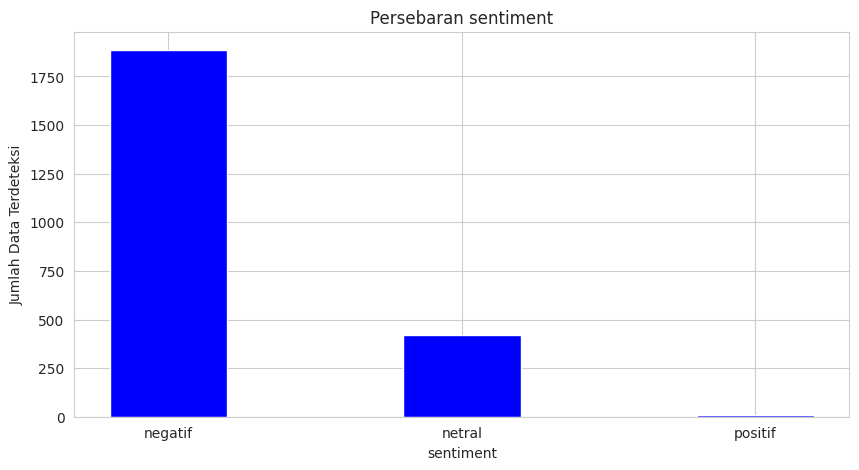

In [473]:
# VISUALISASI DATA TERDETEKSI IKLAN
labels = ["negatif", "netral", "positif"]

fig = plt.figure(figsize = (10, 5))
plt.bar(labels, dist, color ='blue', width = 0.4)

plt.xlabel("sentiment")
plt.ylabel("Jumlah Data Terdeteksi")
plt.title("Persebaran sentiment")
plt.show()

# TOPIK

In [474]:
#17. a. Fungsi LDA MODEL
def ldamodel(ntopics, alph, beta, doc_term_matrix, dictionary):
    lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=ntopics,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alph,
                                           eta=beta)
    return lda_model

In [475]:
#fungsi menghitung nilai korehen
def compute_coherence_values(corpus, dictionary, k, a, b):

    lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_berita, dictionary=dictionary, coherence='c_v')

    return coherence_model_lda.get_coherence()

In [476]:
#17.b. Fungsi TUNING PARAMETER
def get_tuning_param(doc_term_matrix, namafile):
    min_topics = 2
    max_topics = 8
    step_size = 1
    topics_range = range(min_topics, max_topics, step_size)
    # Alpha parameter
    alpha = list(np.arange(0.01, 1, 0.3))
    alpha.append('symmetric')
    alpha.append('asymmetric')
    # Beta parameter
    beta = list(np.arange(0.01, 1, 0.3))
    beta.append('symmetric')
    # Validation sets
    num_of_docs = len(doc_term_matrix)
    corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25),
                # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5),
                gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.75),
                doc_term_matrix]
    corpus_title = ['75% Corpus', '100% Corpus']
    model_results = {'Validation_Set': [],
                    'Topics': [],
                    'Alpha': [],
                    'Beta': [],
                    'Coherence': []
                    }
    # Can take a long time to run
    if 1 == 1:
        pbar = tqdm.tqdm(total=540)

        # iterate through validation corpuses
        for i in range(len(corpus_sets)):
            # iterate through number of topics
            for k in topics_range:
                # iterate through alpha values
                for a in alpha:
                    # iterare through beta values
                    for b in beta:
                        # get the coherence score for the given parameters
                        cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary,
                                                    k=k, a=a, b=b)
                        # Save the model results
                        model_results['Validation_Set'].append(corpus_title[i])
                        model_results['Topics'].append(k)
                        model_results['Alpha'].append(a)
                        model_results['Beta'].append(b)
                        model_results['Coherence'].append(cv)

                        pbar.update(1)
        pd.DataFrame(model_results).to_csv(namafile, index=False)
        pbar.close()

In [477]:
sentiment_df = all_df_copy.copy()
sentiment_df.drop(sentiment_df[sentiment_df['sentiment'] != 0].index, inplace = True)

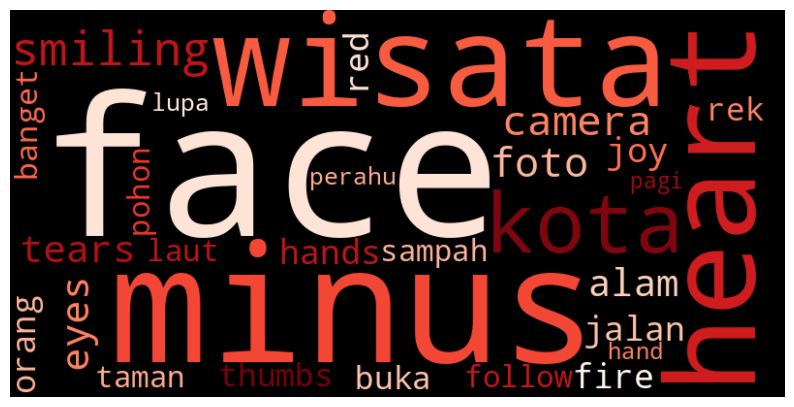

In [478]:
#Visualisasi Word Cloud
full = ''
for komen in sentiment_df["hasil"]:
    full += komen
words = full.split()

word_count = Counter(words)
top = word_count.most_common(30)
word_freq = dict(top)

wordcloud = WordCloud(width=800, height=400, colormap='Reds').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [479]:
data_berita = [berita.split() for berita in sentiment_df["hasil"]]
dictionary = corpora.Dictionary(data_berita)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_berita]

In [480]:
# get_tuning_param(doc_term_matrix,"tuning_lda_all.csv")
df_tuning_all = pd.read_csv("tuning_lda_all.csv")
df_tuning_all

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.448376
1,75% Corpus,2,0.01,0.31,0.349961
2,75% Corpus,2,0.01,0.61,0.553360
3,75% Corpus,2,0.01,0.9099999999999999,0.487064
4,75% Corpus,2,0.01,symmetric,0.488777
...,...,...,...,...,...
355,100% Corpus,7,asymmetric,0.01,0.445588
356,100% Corpus,7,asymmetric,0.31,0.483375
357,100% Corpus,7,asymmetric,0.61,0.397996
358,100% Corpus,7,asymmetric,0.9099999999999999,0.454900


<Axes: xlabel='Topics'>

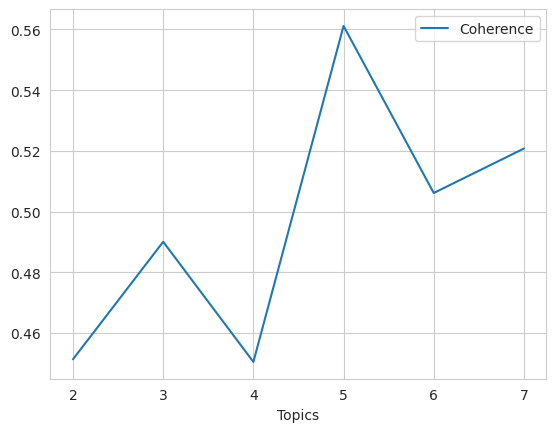

In [481]:
#17.e. Menentukan jumlah topik
df_plot = df_tuning_all[(df_tuning_all.Alpha == "0.01") & (df_tuning_all.Beta == "0.31") & (df_tuning_all.Validation_Set == "100% Corpus")].copy()
df_plot.plot(x='Topics', y = "Coherence", kind="line")

In [482]:
df_plot_2 = df_tuning_all[(df_tuning_all.Topics == 5) & (df_tuning_all.Validation_Set == "100% Corpus")].copy()
df_plot_2.sort_values(by="Coherence", ascending=False)

,Validation_Set,Topics,Alpha,Beta,Coherence
327,100% Corpus,6,asymmetric,0.61,0.545549
303,100% Corpus,6,0.01,0.9099999999999999,0.542856
326,100% Corpus,6,asymmetric,0.31,0.526568
313,100% Corpus,6,0.61,0.9099999999999999,0.525807
302,100% Corpus,6,0.01,0.61,0.524603
328,100% Corpus,6,asymmetric,0.9099999999999999,0.521317
306,100% Corpus,6,0.31,0.31,0.520391
308,100% Corpus,6,0.31,0.9099999999999999,0.520297
311,100% Corpus,6,0.61,0.31,0.518051
323,100% Corpus,6,symmetric,0.9099999999999999,0.515205


In [483]:
#17.g. Ektraksi topik
n = 5
a = 0.01
b = 0.3
lda = ldamodel(n,a,b,doc_term_matrix, dictionary)

from pprint import pprint
pprint(lda.print_topics())

[(0,
  '0.023*"wisata" + 0.014*"face" + 0.013*"ayo" + 0.011*"kawasan" + '
  '0.011*"coba" + 0.010*"video" + 0.010*"menarik" + 0.010*"mencoba" + '
  '0.010*"cek" + 0.010*"makan"'),
 (1,
  '0.028*"minus" + 0.024*"preservation" + 0.013*"sih" + 0.012*"looking" + '
  '0.012*"support" + 0.012*"denmark" + 0.012*"climate" + 0.012*"works" + '
  '0.012*"change" + 0.012*"carbon"'),
 (2,
  '0.014*"ditemukan" + 0.014*"bayi" + 0.014*"jenazah" + 0.007*"fire" + '
  '0.007*"heart" + 0.004*"bahan" + 0.004*"sambal" + 0.004*"face" + '
  '0.003*"pohon" + 0.003*"tree"'),
 (3,
  '0.029*"sampah" + 0.027*"plastik" + 0.014*"foto" + 0.013*"take" + '
  '0.012*"penebangan" + 0.012*"nasib" + 0.012*"terancam" + 0.008*"face" + '
  '0.007*"pohon" + 0.007*"smiling"'),
 (4,
  '0.009*"wisata" + 0.008*"gym" + 0.006*"time" + 0.006*"raya" + 0.005*"face" + '
  '0.005*"arah" + 0.005*"pemkot" + 0.004*"nby" + 0.004*"kota" + '
  '0.004*"nsurabaya"')]


# MODEL PREDIKSI

In [484]:
prediksi_df = pd.read_csv('sentimen_lexicon.csv', sep=';')

# Example sentiment data
texts = prediksi_df['hasil'].astype(str).tolist()

# Example sentiment labels (0: negative, 1: neutral, 2: positive)
labels = np.array(prediksi_df['sentiment'].tolist())

# Split the data into training and testing sets
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts_train)
vocab_size = len(tokenizer.word_index) + 1

# Convert text data to sequences
sequences_train = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

# Pad sequences to have the same length
max_length = 10
X_train = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_test = pad_sequences(sequences_test, maxlen=max_length, padding='post')

# Convert labels to one-hot encoding
num_classes = 3
y_train = np.eye(num_classes)[labels_train]
y_test = np.eye(num_classes)[labels_test]

In [485]:
list_akurasi = []
list_model = []

## LSTM

In [486]:
# Create the LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

list_akurasi.append(accuracy)
list_model.append('LSTM')

Epoch 1/3
116/116 [==============================] - 12s 49ms/step - loss: 0.8225 - accuracy: 0.6149 - val_loss: 0.6803 - val_accuracy: 0.6739
Epoch 2/3
116/116 [==============================] - 4s 31ms/step - loss: 0.4102 - accuracy: 0.8323 - val_loss: 0.6137 - val_accuracy: 0.7840
Epoch 3/3
15/15 [==============================] - 0s 6ms/step - loss: 0.6781 - accuracy: 0.7797
Test Loss: 0.6780616044998169
Test Accuracy: 0.779697597026825


## BLSTM

In [487]:
# Create the BLSTM model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

list_akurasi.append(accuracy)
list_model.append('B-LSTM')

Epoch 1/3
116/116 [==============================] - 12s 37ms/step - loss: 0.8176 - accuracy: 0.6209 - val_loss: 0.6496 - val_accuracy: 0.7322
Epoch 2/3
116/116 [==============================] - 3s 22ms/step - loss: 0.3299 - accuracy: 0.8794 - val_loss: 0.6298 - val_accuracy: 0.7883
Epoch 3/3
15/15 [==============================] - 0s 5ms/step - loss: 0.8145 - accuracy: 0.7581
Test Loss: 0.8145414590835571
Test Accuracy: 0.758099377155304


## model individu

In [488]:
prediksi_df.dropna(inplace=True)
documents = prediksi_df['hasil']
labels = prediksi_df['sentiment']

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Convert the text data into TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(documents).toarray()

# Split the dataset into training and testing sets
train_vectors, test_vectors, train_labels, test_labels = train_test_split(tfidf_vectors, labels, test_size=0.2, random_state=42, stratify=labels)

# Train an SVM classifier
classifier = svm.SVC(kernel='rbf', probability = True)
classifier.fit(train_vectors, train_labels)
predictions = classifier.predict(test_vectors)
svm_accuracy = accuracy_score(test_labels, predictions)
list_akurasi.append(svm_accuracy)
list_model.append('SVM')
print("SVM Accuracy:", svm_accuracy)

dtree = DecisionTreeClassifier(criterion="entropy")
dtree = dtree.fit(train_vectors, train_labels)
predTree = dtree.predict(test_vectors)
dtree_accuracy = accuracy_score(test_labels, predTree)
list_akurasi.append(dtree_accuracy)
list_model.append('D TREE')
print("Decision Tree Accuracy:", dtree_accuracy)

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr = lr.fit(train_vectors, train_labels)
y_pred = lr.predict(test_vectors)
lr_accuracy = accuracy_score(test_labels, y_pred)
list_akurasi.append(lr_accuracy)
list_model.append('LR')
print("Logistic Regression Accuracy:", lr_accuracy)

lda = LinearDiscriminantAnalysis()
lda = lda.fit(train_vectors, train_labels)
y_pred = lda.predict(test_vectors)
lda_accuracy = accuracy_score(test_labels, y_pred)
list_akurasi.append(lda_accuracy)
list_model.append('LDA')
print("LDA Accuracy:", lda_accuracy)

gnb = GaussianNB()
gnb = gnb.fit(train_vectors, train_labels)
y_pred = gnb.predict(test_vectors)
gnb_accuracy = accuracy_score(test_labels, y_pred)
list_akurasi.append(gnb_accuracy)
list_model.append('GNB')
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)


SVM Accuracy: 0.7186761229314421
Decision Tree Accuracy: 0.7163120567375887
Logistic Regression Accuracy: 0.723404255319149
LDA Accuracy: 0.6643026004728132
Gaussian Naive Bayes Accuracy: 0.624113475177305


## Ensemble Learning

### MAX VOTING

In [ ]:
# 3 model individu
model3 = VotingClassifier(estimators=[('clf', classifier), ('neigh', dtree), ('lda', lda)], voting='hard')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cross_score = cross_val_score(model3, tfidf_vectors, labels, scoring='accuracy', cv=cv, n_jobs=-1)
print('rata-rata akurasi: ', mean(cross_score))

list_akurasi.append(mean(cross_score))
list_model.append('maxvote A')

In [ ]:
# 3 model individu
model3 = VotingClassifier(estimators=[('clf', classifier), ('neigh', dtree), ('lr', lr)], voting='hard')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cross_score = cross_val_score(model3, tfidf_vectors, labels, scoring='accuracy', cv=cv, n_jobs=-1)
print('rata-rata akurasi: ', mean(cross_score))

list_akurasi.append(mean(cross_score))
list_model.append('maxvote B')

In [ ]:
# 4 model individu
model3 = VotingClassifier(estimators=[('clf', classifier), ('dtree', dtree), ('lda', lda), ('lr', lr)], voting='hard')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cross_score = cross_val_score(model3, tfidf_vectors, labels, scoring='accuracy', cv=cv, n_jobs=-1)
print('rata-rata akurasi: ', mean(cross_score))

list_akurasi.append(mean(cross_score)), list_model.append('maxvote C')

## averaging

In [490]:
pred1=classifier.predict_proba(test_vectors)
pred2=dtree.predict_proba(test_vectors)
pred3=lr.predict_proba(test_vectors)
pred4=lda.predict_proba(test_vectors)
pred5=gnb.predict_proba(test_vectors)

finalpred=(pred1+pred2+pred3+pred4+pred5)/5
hasil_pred = []

for i in range(0, finalpred.shape[0]):
  maxIndex = np.argmax(finalpred[i])
  hasil_pred.append(maxIndex)

In [491]:
list_akurasi.append(metrics.accuracy_score(test_labels, hasil_pred)), list_model.append('averaging')

(None, None)

### weighted averaging

In [492]:
all = svm_accuracy + dtree_accuracy + lr_accuracy + lda_accuracy + gnb_accuracy

In [493]:
finalpred=(pred1 * svm_accuracy / all + pred2 * dtree_accuracy / all + pred3 * dtree_accuracy / all + pred4 * lda_accuracy / all + pred5 * gnb_accuracy / all)/5
hasil_pred = []

for i in range(0, finalpred.shape[0]):
  maxIndex = np.argmax(finalpred[i])
  hasil_pred.append(maxIndex)

list_akurasi.append(metrics.accuracy_score(test_labels, hasil_pred)), list_model.append('weighted averaging')

(None, None)

# KESIMPULAN

In [494]:
sort_all = sorted(list(zip(list_model,list_akurasi)), key=lambda l:l[1], reverse = True)
sort_all

[('LSTM', 0.779697597026825),
 ('B-LSTM', 0.758099377155304),
 ('averaging', 0.7446808510638298),
 ('weighted averaging', 0.7423167848699763),
 ('LR', 0.723404255319149),
 ('SVM', 0.7186761229314421),
 ('D TREE', 0.7163120567375887),
 ('LDA', 0.6643026004728132),
 ('GNB', 0.624113475177305)]